In [357]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from pandas import Series
import h5py

In [403]:
DATAPATH = '../../data'
SEC = 15
N_CLUSTER = 5

In [404]:
distancepath = DATAPATH + '/usermap{}.hdf'.format(SEC)
with h5py.File(distancepath,'r') as distance_file:
    sdm = distance_file['adjacency_matrix'].value # sample distance matrix の名残り

In [405]:
scm = np.load(file = DATAPATH + "/cluster/cluster_ham_{:02d}.npy".format(N_CLUSTER)) # sample clustering matrix

In [406]:
#sample flat list from sdm
sfldm = []
for i in range(27):
    for j in range(i+1, 27):
        sfldm.append(sdm[i, j])

In [407]:
#sample flat list from scm
sflcm = []
for i in range(27):
    for j in range(i+1, 27):
        sflcm.append(scm[i, j])

In [408]:
# 01_16みたいなkeyを与える
keys = []
for i in range(27):
    for j in range(i+1, 27):
        keys.append(str(i+1).zfill(2) + "_" + str(j+1).zfill(2))

In [409]:
dmdic = dict(zip(keys, sfldm))
cmdic = dict(zip(keys, sflcm))

In [410]:
# ソート
dmser = Series(dmdic)
dmser = dmser.sort_values()
print(dmser.keys()[:50])

Index(['17_21', '05_21', '05_17', '06_21', '06_17', '05_06', '21_26', '02_21',
       '17_26', '01_06', '01_17', '05_26', '02_05', '01_21', '04_08', '04_11',
       '17_23', '23_26', '02_17', '01_05', '06_26', '04_26', '21_23', '05_23',
       '06_23', '16_17', '11_26', '16_21', '02_06', '21_22', '09_26', '01_26',
       '08_26', '08_11', '04_27', '04_09', '05_16', '11_23', '04_23', '05_22',
       '12_26', '04_12', '01_02', '02_23', '16_23', '02_26', '03_04', '12_17',
       '12_21', '04_24'],
      dtype='object')


In [411]:
sorted_cmlist = []
sorted_keylist = []
for i in dmser.keys():
    if (("16" in i) == False):
        sorted_cmlist.append(cmdic[i])
        sorted_keylist.append(i)

dmser[sorted_keylist]

17_21    267188.490249
05_21    277730.265889
05_17    282797.121645
06_21    292389.156979
06_17    306300.986981
05_06    313008.042890
21_26    313162.630374
02_21    316862.296351
17_26    318352.271245
01_06    323452.367855
01_17    323698.620418
05_26    324552.525800
02_05    326726.291697
01_21    335863.324730
04_08    339065.538452
04_11    339589.915621
17_23    343924.823030
23_26    344122.441979
02_17    344693.884770
01_05    349467.926715
06_26    350251.628931
04_26    352241.919160
21_23    353518.292125
05_23    354579.212183
06_23    354919.850781
11_26    369635.933669
02_06    374482.235257
21_22    374488.675299
09_26    379132.873279
01_26    380258.422999
             ...      
07_14    674873.473449
07_10    675578.770424
03_07    676324.287974
06_15    676877.633861
07_27    678787.240239
15_25    681258.165477
14_22    688692.843725
07_18    689443.201945
01_13    694112.027989
07_19    695511.438928
07_20    696654.490077
19_22    697044.311967
13_20    69

In [412]:
# 積算値を計算
numerator = 0
denominator = 0
value_list = []
for i in sorted_cmlist:
    denominator += 1
    if (i == 1):
        numerator += 1
    value_list.append(numerator / denominator)
print(len(value_list))

325


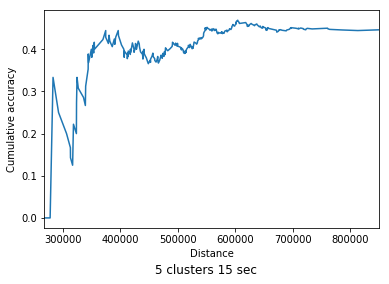

In [413]:
# dmserのkeysを横軸、value_listを縦軸としたグラフをplot
# x = np.arange(325) # 27C2 - 26 = 351 - 26
x = dmser[sorted_keylist].values # 27C2 - 26 = 351 - 26
y = value_list
plt.suptitle('{} clusters {} sec'.format(N_CLUSTER, SEC), y=0)
plt.plot(x, y)
plt.xlabel('Distance')
plt.ylabel('Cumulative accuracy')
plt.xlim(dmser[sorted_keylist].min(), dmser[sorted_keylist].max())
plt.savefig(DATAPATH + '/vis/compare_{:02d}_cluster_{}_sec.png'.format(N_CLUSTER, SEC))

In [380]:
# RANGE = 50
# x = np.arange(RANGE)
# y = value_list[:RANGE]
# plt.figure(figsize=(10, 5), dpi=200)
# plt.plot(x, y)
# plt.xticks(np.arange(RANGE), sorted_keylist[:RANGE], rotation='vertical')
# plt.savefig('extract50.png')